In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys
import argparse

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext, ContextualBanditDataFileContext
from al.agent_rl import PolicyGradientREINFORCE, PolicyGradientActorCritic, UniformRandom
from al.env_al import normal_iid, uniform_iid, sinewave, linear_classifier
from al.policy import PolicyNN, PolicyNNActorCritic

sys.path.append(os.getcwd())

In [144]:
##############################################################################
# Running a single experiment

# true_theta = [1.0, 0.5]
unit_circle_angle = np.random.uniform(0, 2*np.pi) # sample 100-dim theta with first two non-zero and l2-norm theta=1
true_theta = [np.cos(unit_circle_angle), np.sin(unit_circle_angle)] + [0]*98
# infile = '../data/adult.csv'
n_steps = 2500
seed = 0
args = argparse.Namespace() # From https://stackoverflow.com/questions/16878315/what-is-the-right-way-to-treat-python-argparse-namespace-as-a-dictionary
args.n_feat = len(true_theta)
args.optim = 'sgd' #'adam'
args.learn_rate = 1e-4
args.momentum = 0.9 # only for SGD
args.gamma = 1 # discount factor
args.sample_cost = 0.9 # 0 <= cost
args.in_dim = len(true_theta)+1 # input dim of policy
args.n_act = 2 # num actions

agent = PolicyGradientActorCritic(PolicyNNActorCritic, args) #UniformRandom(n_arm)
# env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
env = ContextualBanditFunctionalContext(uniform_iid, true_theta, linear_classifier)
# env = ContextualBanditDataFileContext(infile)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

957 0.3828


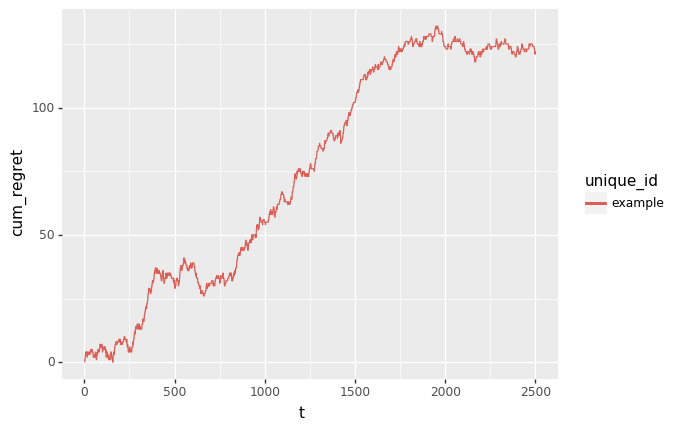

<ggplot: (-9223372029290810424)>


In [145]:
##############################################################################
# Simple display / plot of results

print(env.num_query, env.num_query/n_steps)

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

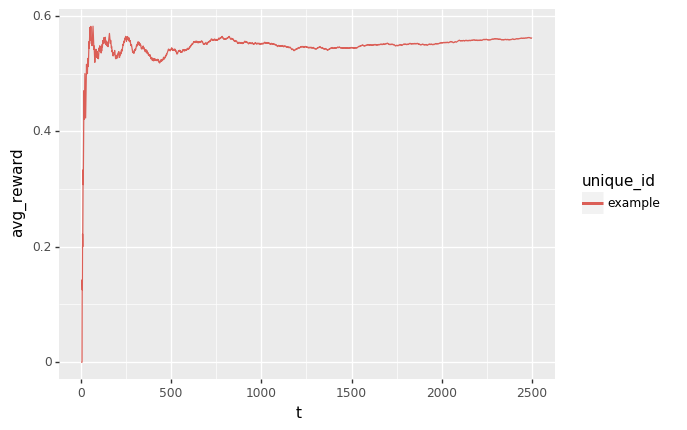

<ggplot: (-9223372029290817932)>
957 0.3828


In [146]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='avg_reward', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [131]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,instant_reward,cum_reward,avg_reward,num_query,logger
0,1,0.0,0.0,"(0, 0.0)",example,0.0,0.0,0.000000,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,0.0,0.0,"(1, 0.0)",example,0.0,0.0,0.000000,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,0.0,0.0,"(0, 1.0)",example,1.0,1.0,0.333333,1,"[-0.02631654394463817, 0.026911775615059405, 0..."
3,4,-1.0,-1.0,"(0, -1.0)",example,1.0,2.0,0.500000,1,"[-0.02631654394463817, 0.026911775615059405, 0..."
4,5,0.0,-1.0,"(1, 1.0)",example,1.0,3.0,0.600000,2,"[-0.02631654394463817, 0.026911775615059405, 0..."
...,...,...,...,...,...,...,...,...,...,...
2495,2496,0.0,214.0,"(0, 1.0)",example,0.0,1322.0,0.529647,644,"[-0.11183665429756051, -0.8735380963584072, -0..."
2496,2497,0.0,214.0,"(0, -1.0)",example,0.0,1322.0,0.529435,644,"[-0.11183665429756051, -0.8735380963584072, -0..."
2497,2498,-1.0,213.0,"(1, -1.0)",example,1.0,1323.0,0.529624,645,"[-0.11183665429756051, -0.8735380963584072, -0..."
2498,2499,0.0,213.0,"(0, 1.0)",example,0.0,1323.0,0.529412,645,"[-0.11025870118486014, -0.8719022929760007, -0..."


In [12]:
agent.w_t

array([1.88939474, 0.84184241])

In [13]:
list(agent.policy.parameters())

[Parameter containing:
 tensor([[-0.2787, -0.5066],
         [ 0.5832,  0.5290]], requires_grad=True), Parameter containing:
 tensor([-0.1500, -0.5051], requires_grad=True), Parameter containing:
 tensor([[ 0.3234, -0.3129],
         [-0.0861, -0.5558]], requires_grad=True), Parameter containing:
 tensor([ 3.3597, -3.1324], requires_grad=True), Parameter containing:
 tensor([[-0.3166,  0.4822]], requires_grad=True), Parameter containing:
 tensor([8.3231e-07], requires_grad=True)]

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)

In [77]:
np.append(np.array([1,2]),23)

array([ 1,  2, 23])